# Assignment Overview

You are going to work on the '5G-Energy consumption' dataset that was provided by the international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

Checkpoint problematic : Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

# Import necessarry libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  RandomizedSearchCV

# Load the data

In [2]:
# load the data into a dataframe
df = pd.read_csv("5G_energy_consumption_dataset.csv")

# Exploratory Data Analysis

In [3]:
df.head(10)

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
5,20230101 070000,B_0,82.959641,0.351585,0.0,7.101719
6,20230101 080000,B_0,91.031390,0.759298,0.0,7.101719
7,20230101 090000,B_0,78.176383,0.887798,0.0,7.101719
8,20230101 100000,B_0,72.645740,0.624745,0.0,7.101719
9,20230101 140000,B_0,66.666667,0.437926,0.0,7.101719


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [5]:
#checking descriptive statistics
df.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [6]:
# checking for missing values
df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

In [7]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['time', 'bs', 'energy', 'load', 'esmode', 'txpower'], dtype='object')

## Extract hour from the time column

In [8]:
# extract hour, day, year from time column
df['hour'] = pd.to_datetime(df['time']).dt.hour

In [9]:
df.head()

,time,bs,energy,load,esmode,txpower,hour
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719,1
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719,2
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719,3
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719,4
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719,5


## Visualize energy consumption during hour of the day

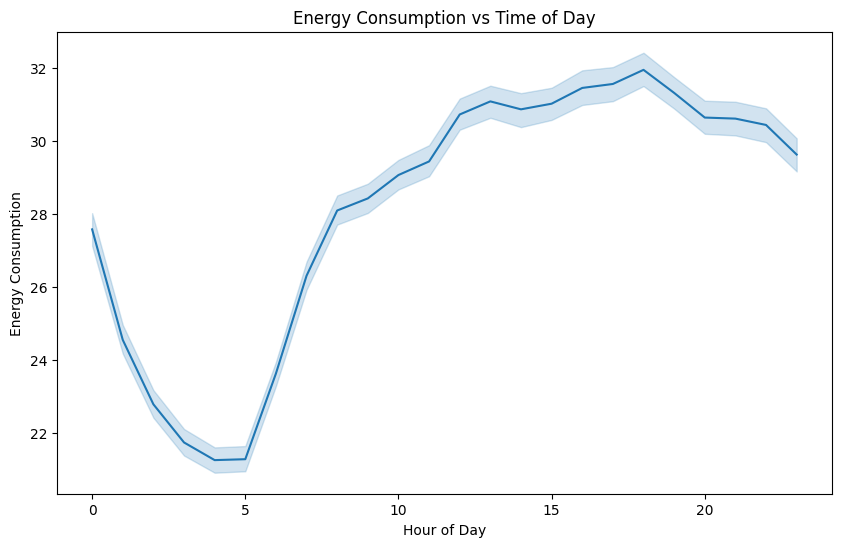

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='energy', data=df)
plt.title('Energy Consumption vs Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption')
plt.show()

<Axes: xlabel='load', ylabel='Count'>

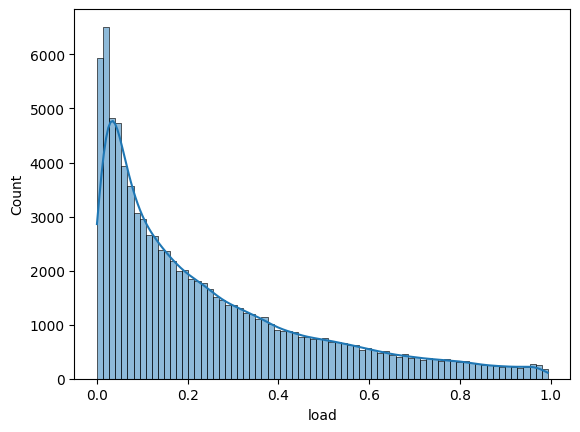

In [11]:
# visualize histplot of load column to check the distribution before handling outliers

sns.histplot(data=df.load, kde=True)

The histogram plot shows that the data in the load column  distribution is skewed to the left.

<Axes: xlabel='esmode', ylabel='Count'>

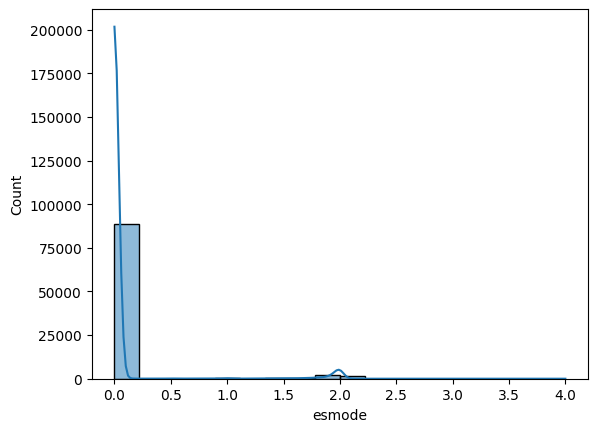

In [12]:
# visualize  to check the distribution before handling outliers

sns.histplot(data=df.esmode, kde=True)

In [13]:
df['esmode'].unique()

array([0.        , 1.97583333, 1.99972222, ..., 0.14722222, 0.95      ,
       0.98333333])

### encoding the ordinal numbers as discrete numbers

In [14]:
# Rounding the values to the nearest integer
df['esmode'] = df['esmode'].round().astype(int)

In [15]:
 df['esmode'].value_counts() 

esmode
0    88529
2     3568
1      514
4       10
3        8
Name: count, dtype: int64

<Axes: xlabel='txpower', ylabel='Count'>

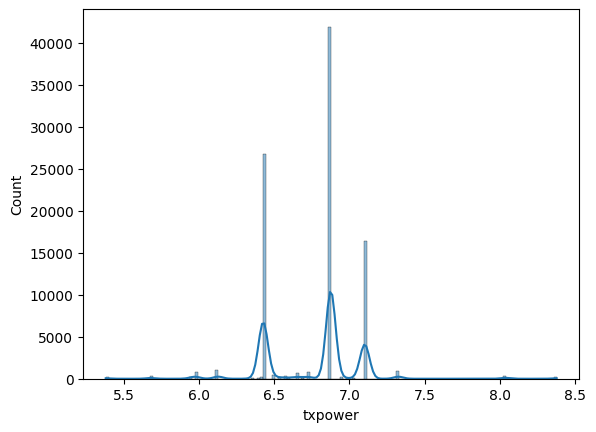

In [16]:
# visualize txpower column to check the distribution before handling outliers
sns.histplot(data=df.txpower, kde=True)

<Axes: xlabel='hour', ylabel='Count'>

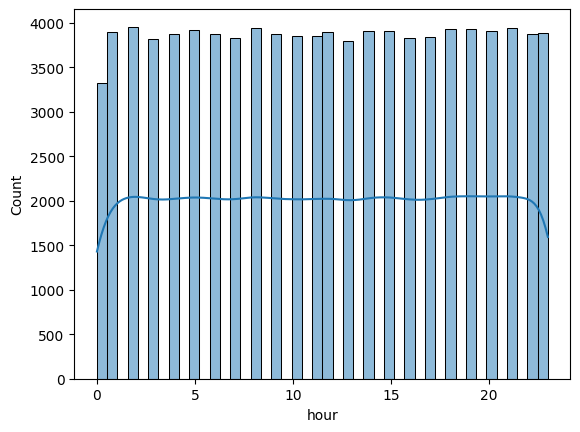

In [17]:
# visualize txpower column to check the distribution before handling outliers
sns.histplot(data=df.hour, kde=True)

## check for outliers

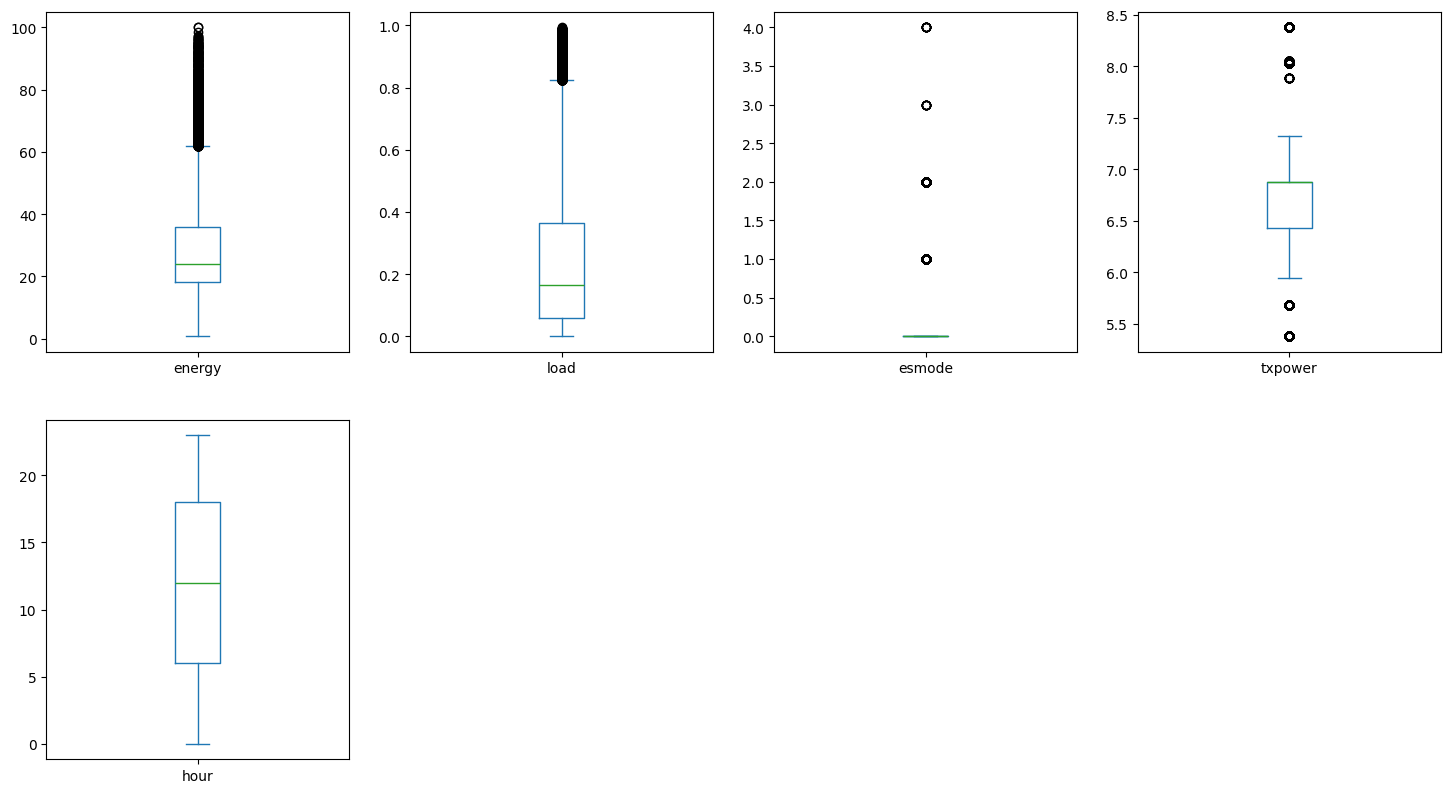

In [18]:
# checking for outliers
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
#plt.savefig('california housing outliers.png')
plt.show()

# Use capping to deal with outliers in the features columns

In [19]:
# Function to cap outliers using the IQR method
def cap_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper limit
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap the values below the lower bound
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Cap the values above the upper bound
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)

    return df

# List of columns to cap outliers in
columns_to_cap = ['txpower', 'load']

# Apply the capping function for the specified columns
for column in columns_to_cap:
    df = cap_outliers_iqr(df, column)

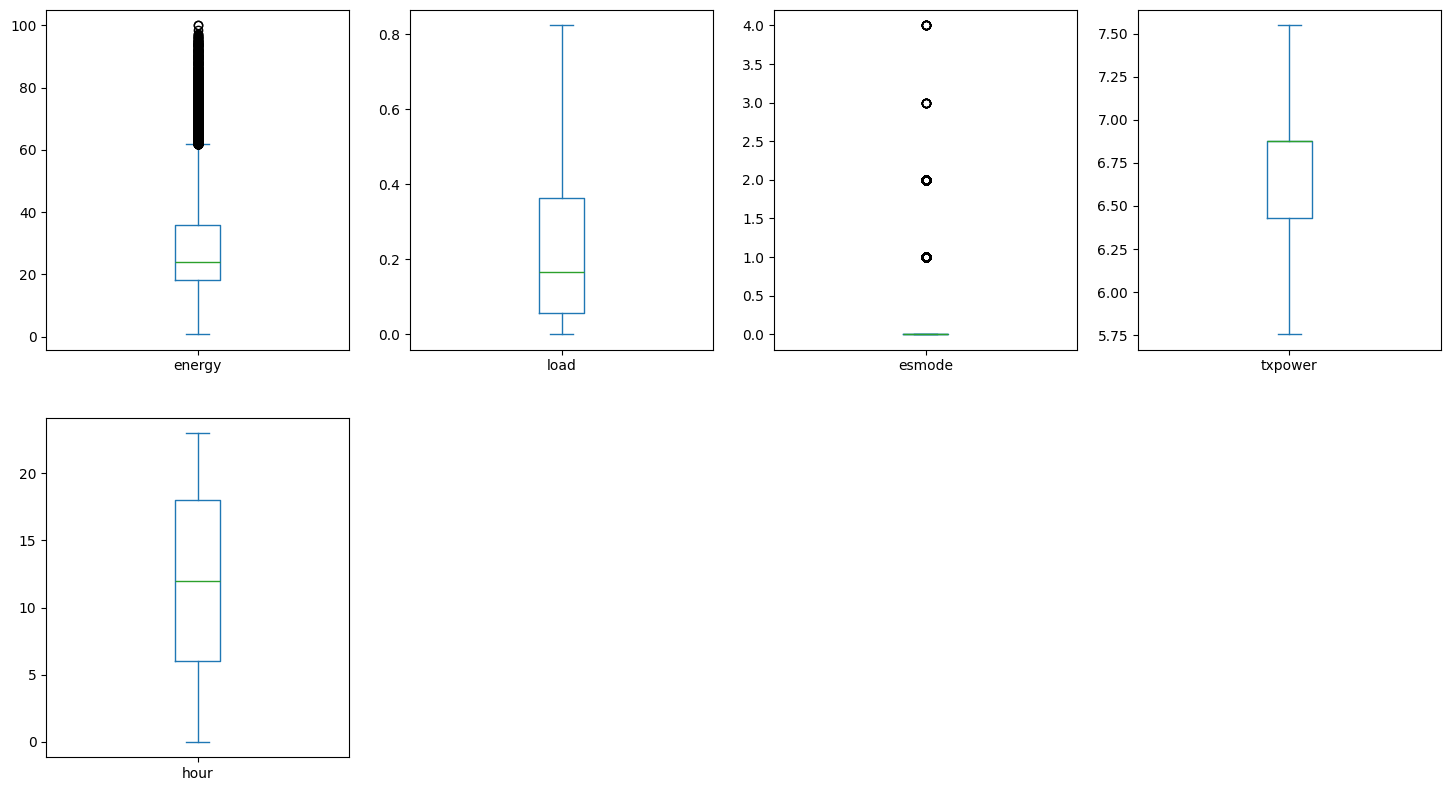

In [20]:
# checking for outliers
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
#plt.savefig('california housing outliers.png')
plt.show()

## correlation matrix between the features and the target variable

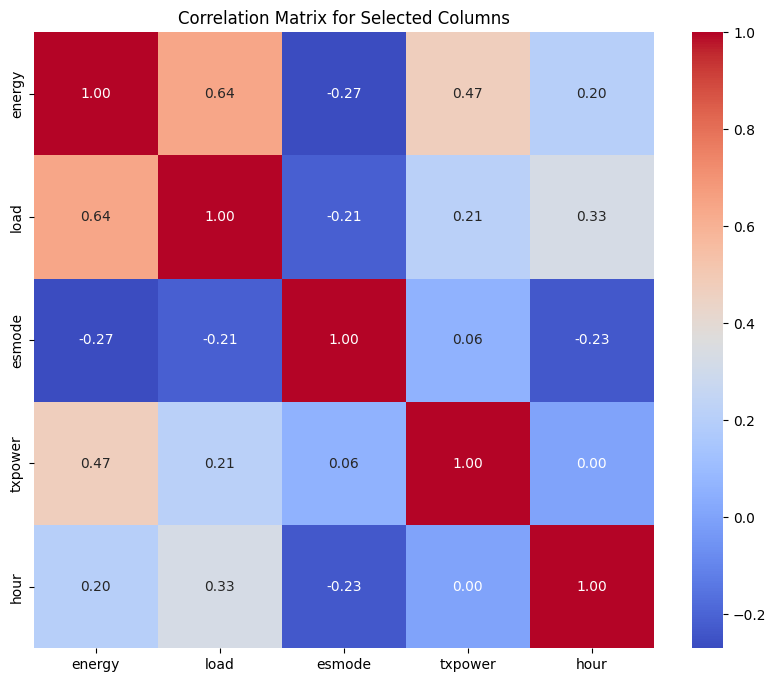

In [21]:
# Select specific columns for the correlation matrix
columns_to_correlate = ['energy', 'load', 'esmode', 'txpower', 'hour']

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[columns_to_correlate].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Selected Columns")
plt.show()

From the correlation above we observe that:

**Load** with a coefficient of 0.64 shows a strong positive correlation, meaning that as load increases, energy consumption increases significantly.

**ESMODE** with a coefficient of -0.27  indicates a weak negative correlation, suggesting that as Energy Saving Mode increases, energy consumption decreases, but not very strongly.

**TXPOWER** with a coefficient of 0.47 has a moderate positive correlation between txpower and energy consumption.

**Hour** with a coefficient of 0.20 showing a weak positive correlation, suggesting that the time of day has a minimal impact on energy consumption.

## Preparing data for Random Forest Regression

In [22]:
# Defining features and target
X = df[['load', 'txpower']]

# The target column (y) remains the same
y = df['energy']

In [23]:
# standardization using Robust Scaler

scaler = RobustScaler() # Initialize scaler

X_scaled = scaler.fit_transform(X)

# Split Dataset

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest Model

In [25]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [26]:
# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [28]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='neg_mean_squared_error')

# Train the model

In [29]:

# Fit the model to the training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  20.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.2s


/home/chijofareen/envs/ml-env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  27.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  42.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  20.3s
[CV] END max_depth=40, max_featu

/home/chijofareen/envs/ml-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/chijofareen/envs/ml-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chijofareen/envs/ml-env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/chijofareen/envs/ml-env/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
# Best parameters found by RandomizedSearchCV
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


In [32]:
# Best estimator
best_rf_random = random_search.best_estimator_

# Make Predictions

In [33]:
# Predict using the best estimator
y_pred_random = best_rf_random.predict(X_test)

# Evaluate the model

In [36]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_random)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_random)

In [38]:
# Print the results
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R-squared (R²): {r2_rf}')

# Output was this before feature importance and Hyperparameter tuning
#Mean Squared Error (MSE): 29.63630739429958
#Root Mean Squared Error (RMSE): 5.443923896813729
#R-squared (R²): 0.8438602109596258'''

Mean Squared Error (MSE): 28.222636311295354
Root Mean Squared Error (RMSE): 5.312498123415702
R-squared (R²): 0.8513081801595679


After using hyperparameters the model increased perfomance from 84% to 85%. So the model was able to explain 85% of the variability in energy consumption.This is a strong indication that the model is capturing the relationships between the features and energy consumption quite well.